Initial Imports and Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix, roc_curve, auc,classification_report)
# Loading dataset
url='https://raw.githubusercontent.com/Prachifox/Cardiovascular_diseases/master/cardio_train.csv'
df= pd.read_csv(url,sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(70000, 13)

In [ ]:
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
id,int64
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64


In [ ]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


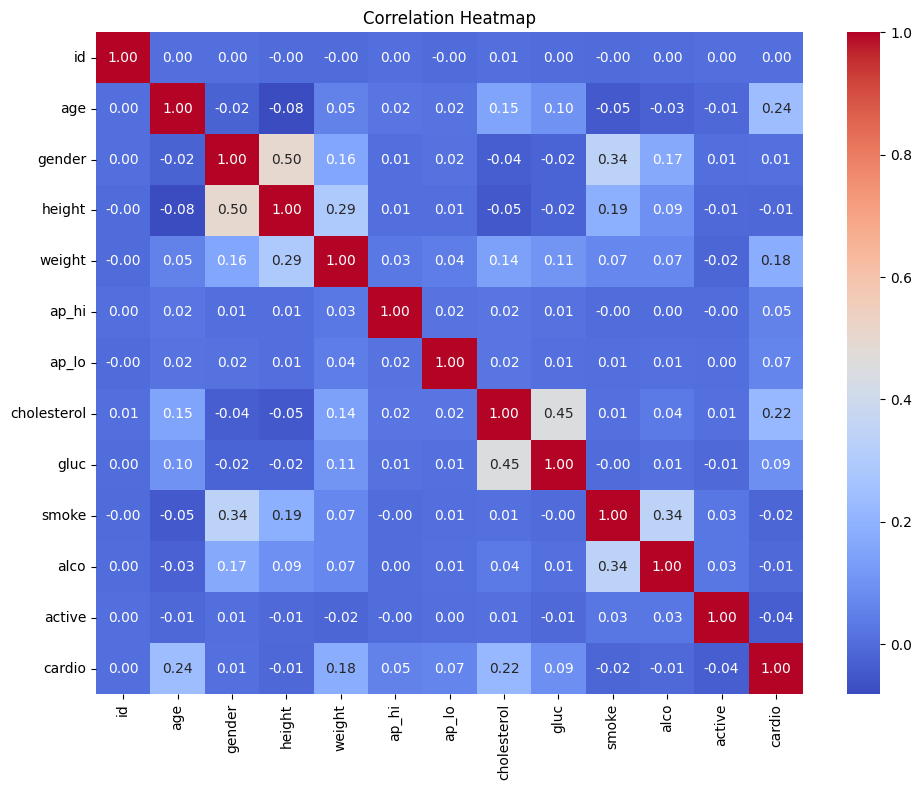

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Data Cleaning

In [ ]:
#filtering out implausible values
df.drop(df[(df['ap_hi'] > 250) | (df['ap_lo'] > 200) | (df['ap_hi'] < 50) | (df['ap_lo'] < 20)].index, inplace=True)
df.drop(df[df['ap_lo'] > df['ap_hi']].index, inplace=True)

In [ ]:
df['age'] = (df['age'] / 365).astype(int)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['height','weight','ap_hi','ap_lo']] = scaler.fit_transform(df[['height','weight','ap_hi','ap_lo']])

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,0.444592,-0.845590,-0.998635,-0.135799,1,1,0,0,1,0
1,1,55,1,-1.021841,0.759203,0.798243,0.916138,3,1,0,0,1,1
2,2,51,1,0.077984,-0.706043,0.199283,-1.187735,3,1,0,0,0,1
3,3,48,2,0.566794,0.549882,1.397202,1.968074,1,1,0,0,1,1
4,4,47,1,-1.021841,-1.264232,-1.597594,-2.239672,1,1,0,0,0,0


Feature Engineering

In [ ]:
df['BMI'] = df['weight'] / ( (df['height']/100) ** 2 )
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
df['weight_height_ratio'] = df['weight'] / df['height']

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,pulse_pressure,weight_height_ratio
0,0,50,2,0.444592,-0.845590,-0.998635,-0.135799,1,1,0,0,1,0,-4.277968e+04,-0.862836,-1.901949
1,1,55,1,-1.021841,0.759203,0.798243,0.916138,3,1,0,0,1,1,7.270953e+03,-0.117895,-0.742976
2,2,51,1,0.077984,-0.706043,0.199283,-1.187735,3,1,0,0,0,1,-1.160982e+06,1.387019,-9.053748
3,3,48,2,0.566794,0.549882,1.397202,1.968074,1,1,0,0,1,1,1.711664e+04,-0.570872,0.970161
4,4,47,1,-1.021841,-1.264232,-1.597594,-2.239672,1,1,0,0,0,0,-1.210766e+04,0.642078,1.237210


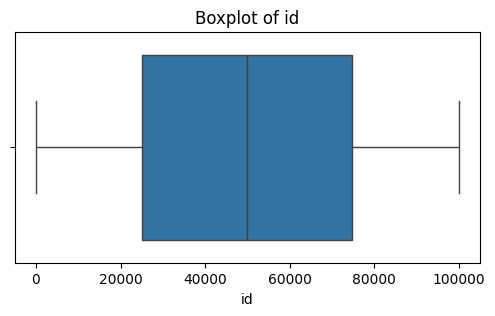

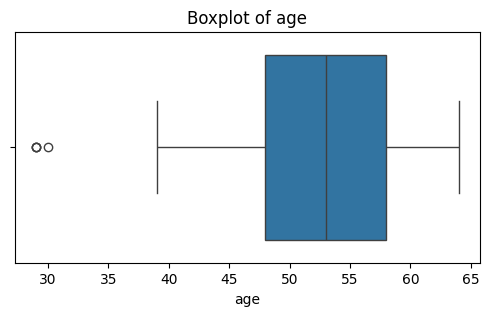

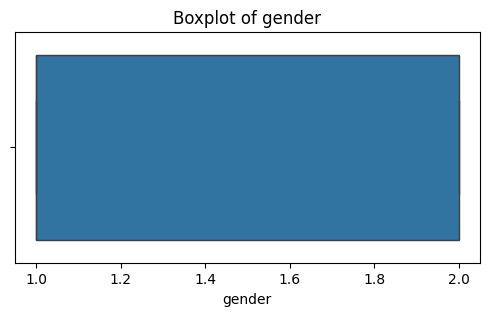

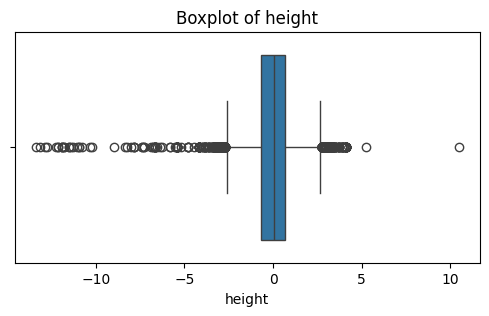

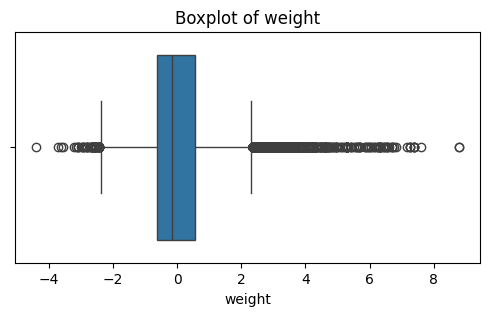

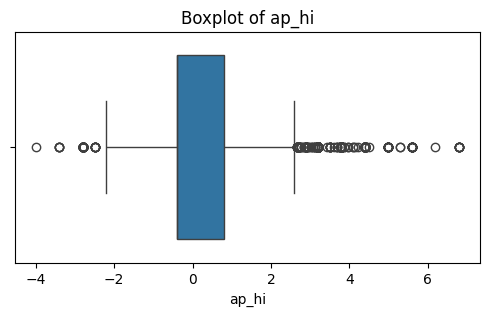

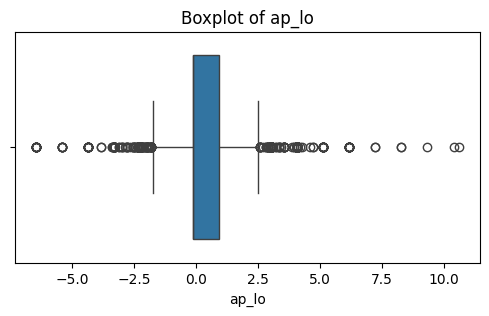

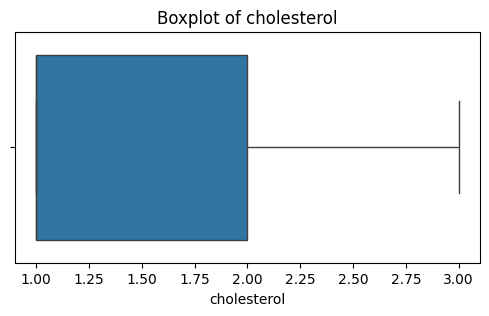

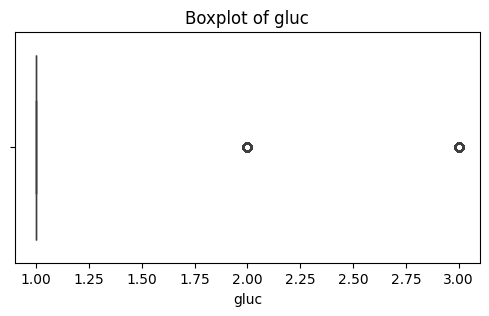

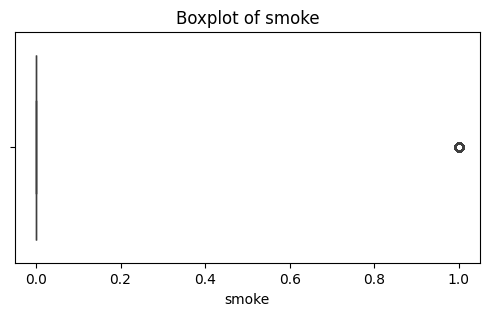

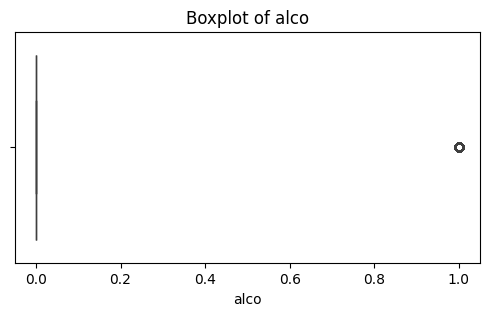

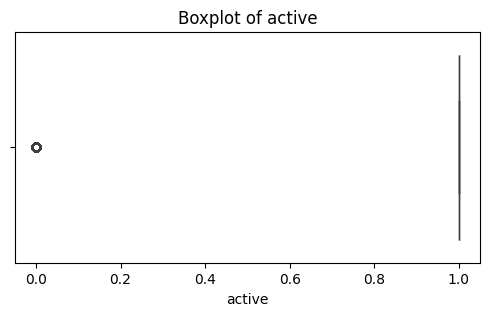

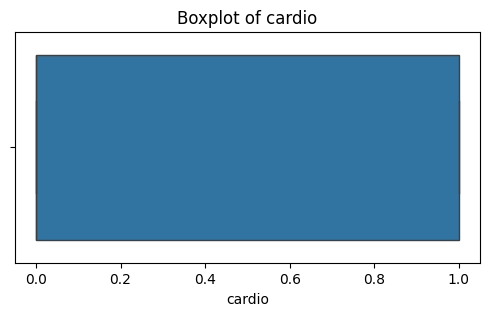

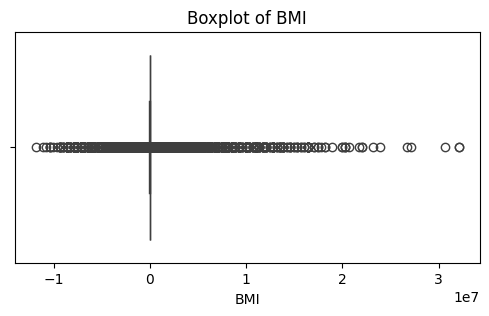

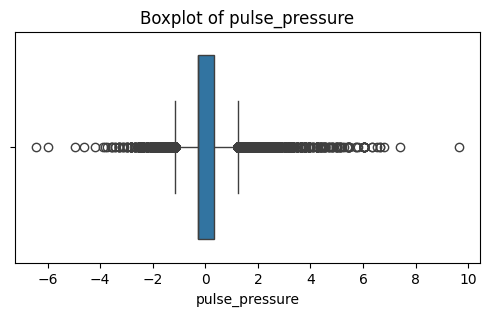

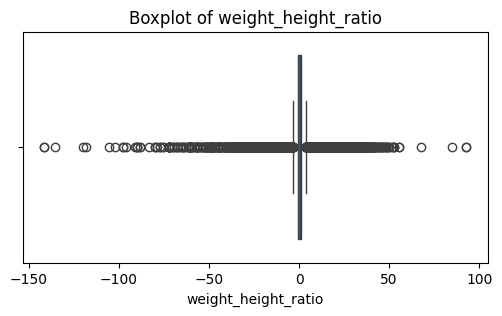

In [ ]:
for col in df.columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
outliers_col=[]
for col in df.columns:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  count_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
  if count_outliers > 0:
      outliers_col.append(col)

In [ ]:
outliers_col

['age',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'gluc',
 'smoke',
 'alco',
 'active',
 'BMI',
 'pulse_pressure',
 'weight_height_ratio']

In [ ]:
def outliers_handling(df: pd.DataFrame, cols: list[str]) -> None:
    for col in cols:
        s = df[col]
        if not pd.api.types.is_numeric_dtype(s):
            continue

        q1 = s.quantile(0.25)
        q3 = s.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        df.loc[df[col] < lower_bound, col] = lower_bound
        df.loc[df[col] > upper_bound, col] = upper_bound

outliers_handling(df, cols=outliers_col)

/tmp/ipython-input-1784964630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


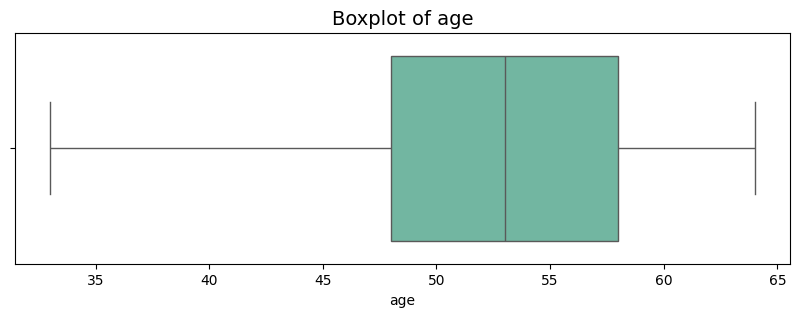

/tmp/ipython-input-1784964630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


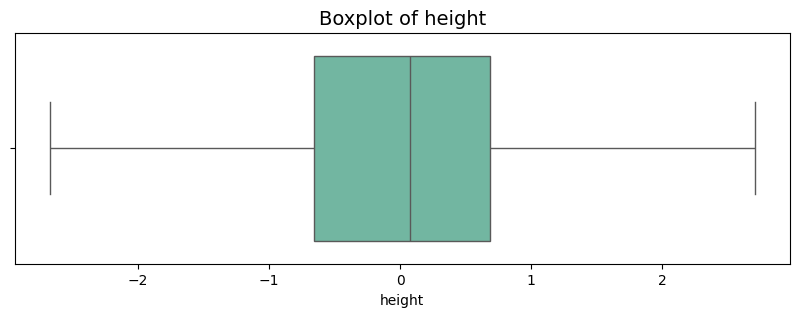

/tmp/ipython-input-1784964630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


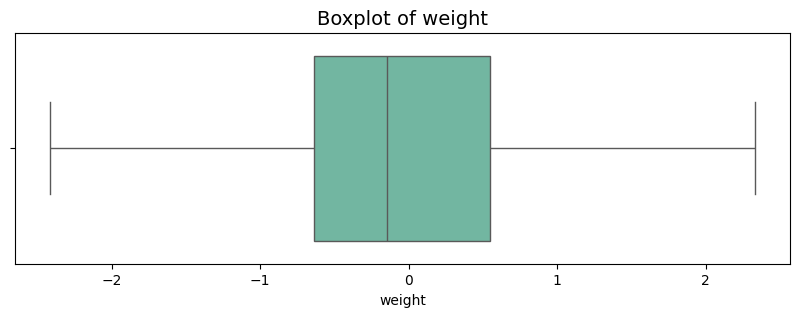

/tmp/ipython-input-1784964630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


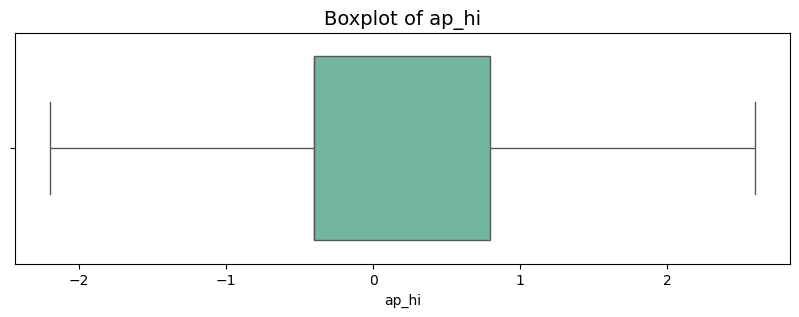

/tmp/ipython-input-1784964630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


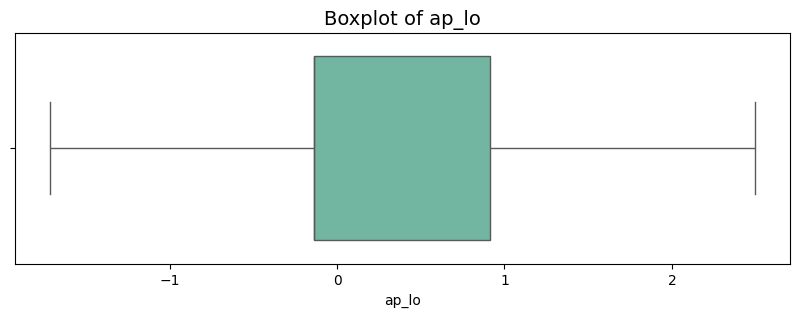

/tmp/ipython-input-1784964630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


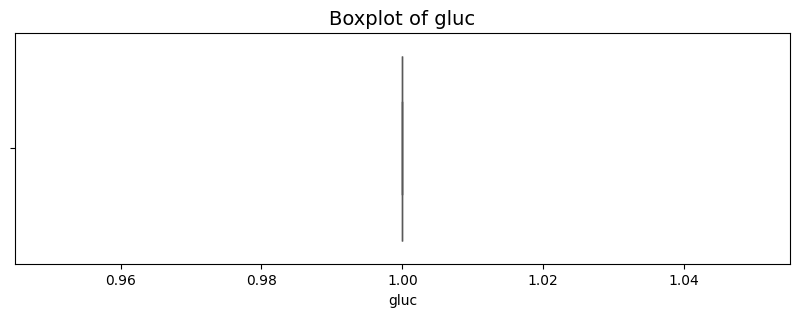

/tmp/ipython-input-1784964630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


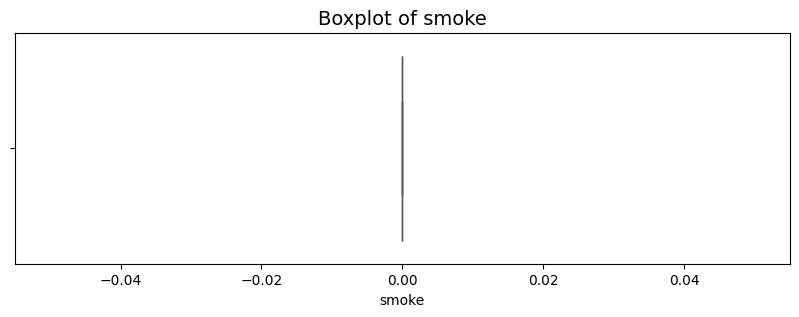

/tmp/ipython-input-1784964630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


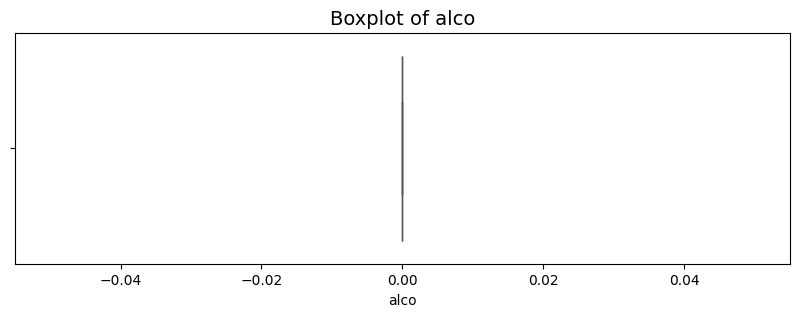

/tmp/ipython-input-1784964630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


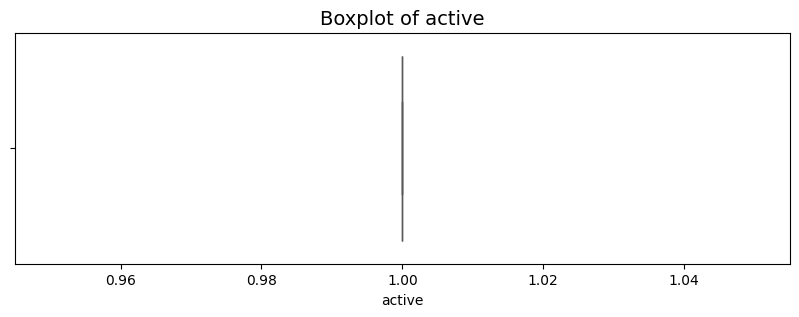

/tmp/ipython-input-1784964630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


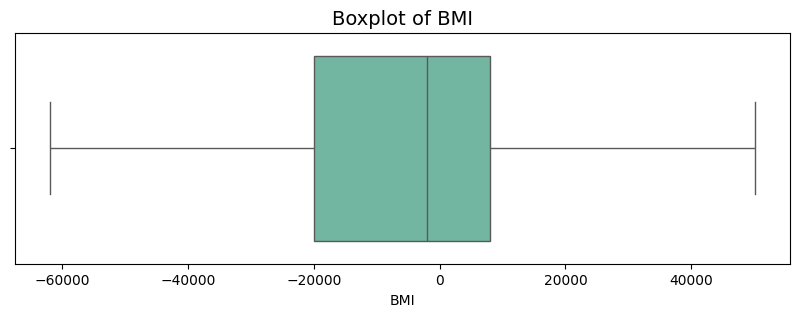

/tmp/ipython-input-1784964630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


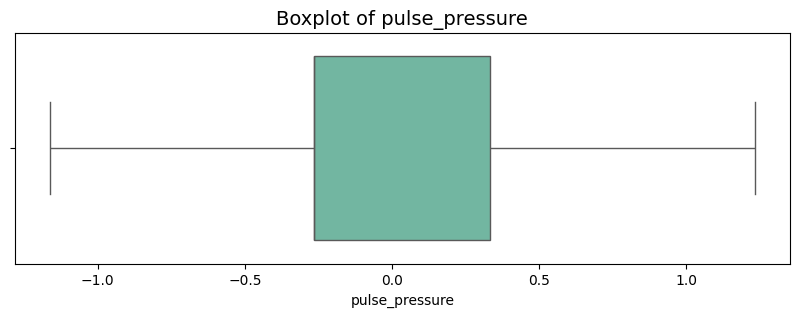

/tmp/ipython-input-1784964630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


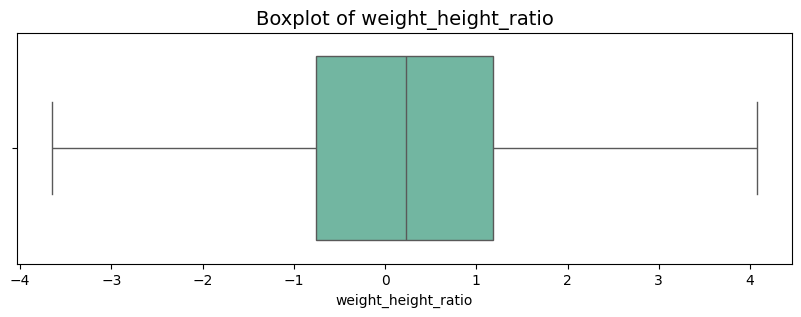

In [ ]:
for col in outliers_col:
  plt.figure(figsize=(10,3))
  sns.boxplot(data=df,x=df[col],palette="Set2")
  plt.title(f"Boxplot of {col}",fontsize=14)
  plt.show()

In [ ]:
df.shape

(68694, 16)

Data Splitting

In [ ]:
X = df.drop('cardio', axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape

(54955, 15)

In [ ]:
X_test.shape

(13739, 15)

Model Building

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:13:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 27175, number of negative: 27780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 54955, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494495 -> initscore=-0.022019
[LightGBM] [Info] Start training from score -0.022019


In [ ]:
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42))
]

stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
stack_pred = stack.predict(X_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:13:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 27175, number of negative: 27780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 54955, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494495 -> initscore=-0.022019
[LightGBM] [Info] Start training from score -0.022019


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:14:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:14:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:14:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:14:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:14:49] WARNING: /w

[LightGBM] [Info] Number of positive: 21740, number of negative: 22224
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1270
[LightGBM] [Info] Number of data points in the train set: 43964, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494495 -> initscore=-0.022019
[LightGBM] [Info] Start training from score -0.022019
[LightGBM] [Info] Number of positive: 21740, number of negative: 22224
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1272
[LightGBM] [Info] Number of data points in the train set: 43964, number of used features: 11
[LightGBM] [Info] 

Model Evaluation

Random Forest
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      6929
           1       0.72      0.70      0.71      6810

    accuracy                           0.72     13739
   macro avg       0.72      0.72      0.72     13739
weighted avg       0.72      0.72      0.72     13739

AUC-ROC: 0.7180071244968633
--------------------------------------------------


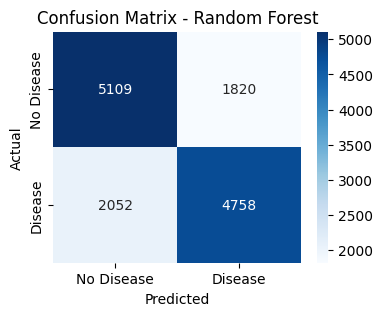

XGBoost
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6929
           1       0.75      0.69      0.72      6810

    accuracy                           0.73     13739
   macro avg       0.73      0.73      0.73     13739
weighted avg       0.73      0.73      0.73     13739

AUC-ROC: 0.7299948777711586
--------------------------------------------------


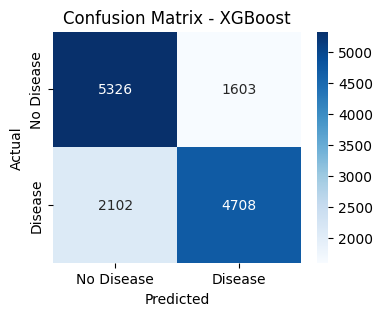

LightGBM
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6929
           1       0.76      0.70      0.73      6810

    accuracy                           0.74     13739
   macro avg       0.74      0.74      0.74     13739
weighted avg       0.74      0.74      0.74     13739

AUC-ROC: 0.7394097865723854
--------------------------------------------------


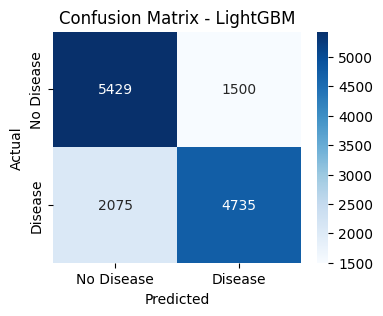

Stacking
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      6929
           1       0.76      0.70      0.73      6810

    accuracy                           0.74     13739
   macro avg       0.74      0.74      0.74     13739
weighted avg       0.74      0.74      0.74     13739

AUC-ROC: 0.7403831795922943
--------------------------------------------------


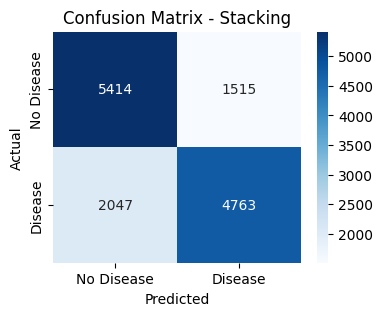

{'Model': 'Stacking',
 'Precision': 0.7586811086333227,
 'Recall': 0.6994126284875184,
 'F1-score': 0.7278422982885085,
 'ROC AUC': np.float64(0.7403831795922943)}

In [ ]:
def evaluate_model(y_true, y_pred, model, model_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    print(model_name)
    print(classification_report(y_true, y_pred))
    print("AUC-ROC:", roc_auc_score(y_true, y_pred))
    print("-"*50)
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['No Disease','Disease'],yticklabels=['No Disease','Disease'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    return {"Model": model_name, "Precision": precision, "Recall": recall, "F1-score": f1, "ROC AUC": auc}

# Evaluate all models
evaluate_model(y_test, rf_pred, rf, "Random Forest")
evaluate_model(y_test, xgb_pred, xgb, "XGBoost")
evaluate_model(y_test, lgbm_pred, lgbm, "LightGBM")
evaluate_model(y_test, stack_pred, stack, "Stacking")

Model Interpretation

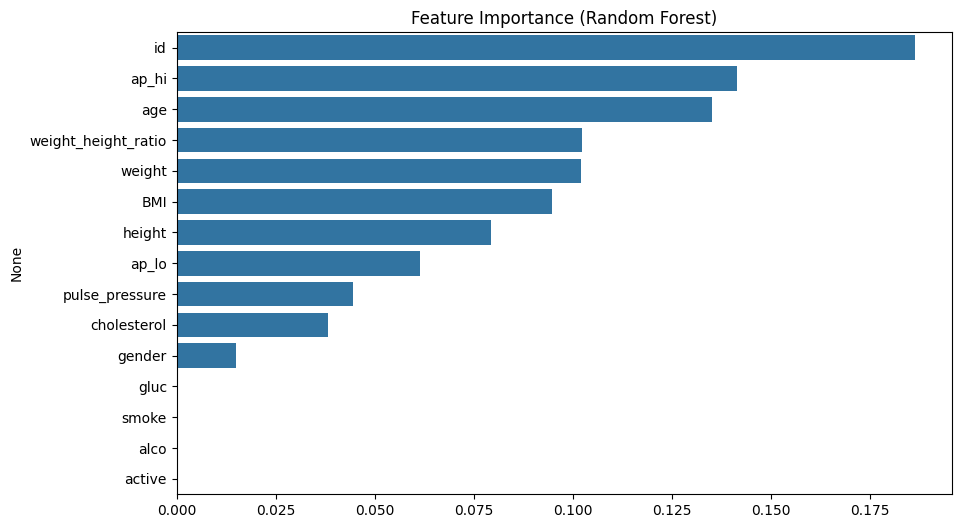

In [ ]:
rf_importances = rf.feature_importances_
indices = np.argsort(rf_importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=rf_importances[indices], y=X.columns[indices])
plt.title("Feature Importance (Random Forest)")
plt.show()

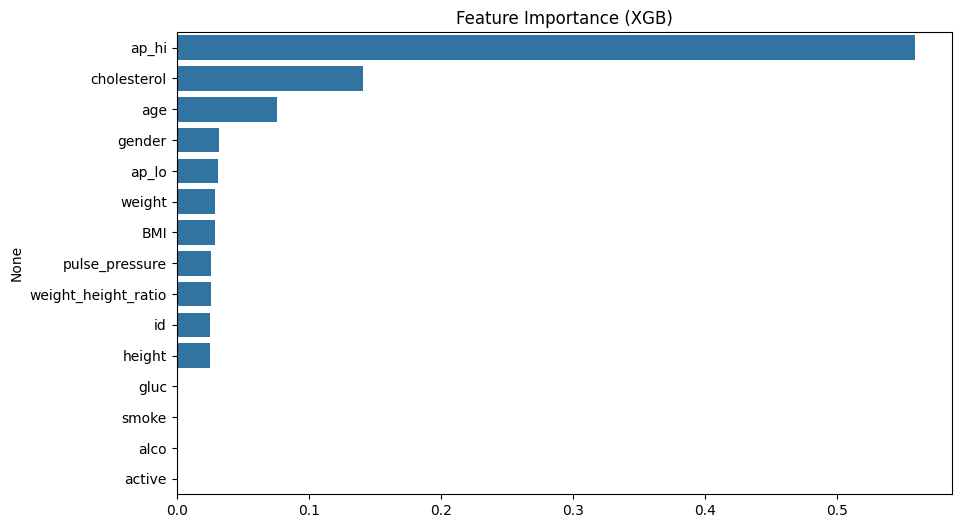

In [ ]:
xgb_importances = xgb.feature_importances_
indices = np.argsort(xgb_importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=xgb_importances[indices], y=X.columns[indices])
plt.title("Feature Importance (XGB)")
plt.show()

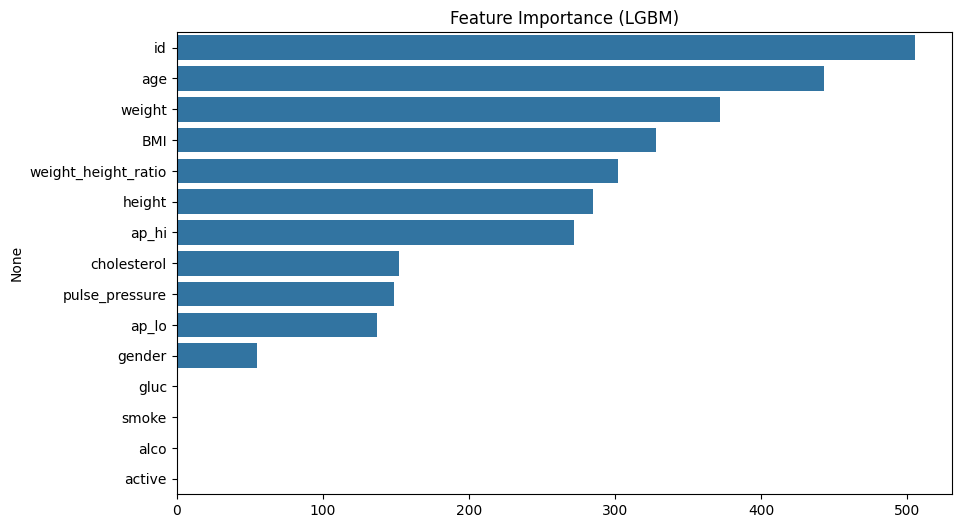

In [ ]:
lgbm_importances = lgbm.feature_importances_
indices = np.argsort(lgbm_importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=lgbm_importances[indices], y=X.columns[indices])
plt.title("Feature Importance (LGBM)")
plt.show()